In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime
import numpy as np
%matplotlib inline

In [2]:
plt.style.use(['dark_background', 'seaborn-talk'])

In [3]:
links = pd.read_csv('email-links-all.csv')

In [4]:
links.shape

(614586, 3)

In [5]:
links = links[links.Date > '1980-01-01 00:00:00'][links.Date < '2043-12-28 19:34:12']

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


In [6]:
links.head()

,Date,From,To
0,2001-05-14 23:39:00,phillip.allen@enron.com,tim.belden@enron.com
1,2001-05-04 20:51:00,phillip.allen@enron.com,john.lavorato@enron.com
2,2000-10-18 10:00:00,phillip.allen@enron.com,leah.arsdall@enron.com
3,2000-10-23 13:13:00,phillip.allen@enron.com,randall.gay@enron.com
4,2000-08-31 12:07:00,phillip.allen@enron.com,greg.piper@enron.com


Count the number of contact events between emails. Here, we consider the number of interactions as weights.

In [7]:
weight_counts = links.groupby(['From', 'To']).size().reset_index(name = 'Count')
weight_counts.to_csv('weighted_links.csv', index=False)

In [8]:
weight_counts.shape

(83714, 3)

In [9]:
weight_counts.sort_values('Count').head()

,From,To,Count
0,101qi@msn.com,enlvwvz@msn.com,1
39614,karen.white@csfb.com,klay@enron.com,1
39615,karen@mpenner.com,jarnold@enron.com,1
39616,karen@mpenner.com,kenneth.lay@enron.com,1
39625,kari.oquinn@enron.com,amy.fitzpatrick@enron.com,1


In [10]:
thresholded_weight_counts = weight_counts.loc[weight_counts['Count'] > 10]

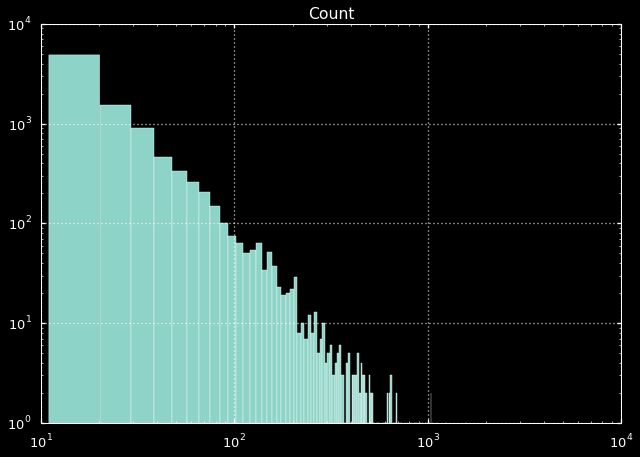

In [11]:
fig, ax = plt.subplots()
thresholded_weight_counts.hist(ax=ax, column='Count', bins=1000)
ax.set_xscale('log')
ax.set_yscale('log')

Count From messages per email

In [12]:
from_counts = links.groupby(['From']).size().reset_index(name = 'CountFrom')
from_counts.sort_values('CountFrom').shape

(12661, 2)

Get timestamps for each From email

In [13]:
from_spikes = links.groupby('From')['Date'].apply(list)
from_spikes.size

12661

Threshold. Discard emails that are note active

In [14]:
from_spikes = from_spikes[from_spikes.str.len() > 3]
from_spikes.size

6601

In [15]:
from_spikes[:10]

From
1800flowers@shop2u.com             [2000-11-21 01:21:00, 2000-11-21 01:21:00, 200...
2000greetings@postalmanager.com    [2002-01-08 18:25:48, 2002-01-22 17:53:03, 200...
2740741@skytel.com                 [2000-09-06 15:34:00, 2000-09-06 16:33:00, 200...
40ees@enron.com                    [2001-10-05 18:45:16, 2001-10-05 18:45:16, 200...
40enron@enron.com                  [2001-06-06 18:08:58, 2001-05-03 19:48:48, 200...
7409949@skytel.com                 [2001-06-26 17:07:00, 2001-07-18 21:04:00, 200...
7409950@skytel.com                 [2001-11-25 20:17:03, 2001-11-25 20:22:26, 200...
8774754543@skytel.com              [2001-11-17 17:51:21, 2002-01-17 15:34:43, 200...
8777865122@skytel.com              [2002-01-10 19:10:59, 2002-01-10 19:00:10, 200...
9069761@skytel.com                 [2001-07-18 20:20:00, 2000-11-07 13:47:00, 200...
Name: Date, dtype: object

Timerange in the dataset

In [16]:
timestamps = list(set(links.Date.tolist()))
timestamps = [datetime.strptime(date, '%Y-%m-%d %H:%M:%S') for date in timestamps]
len(timestamps)

166316

In [17]:
timestamps.sort()

In [18]:
#extract the earliest and the latest dates in the dataset
start_time = min(timestamps)
end_time = max(timestamps)

Extracting spikes

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


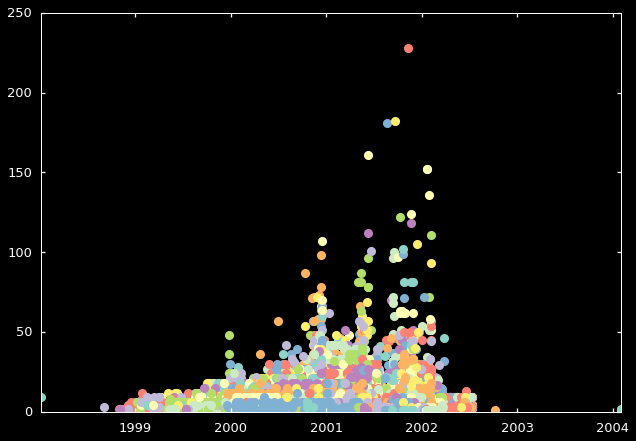

In [19]:
#visualize timeline. Assign random number to each timestamp
n = 10
# for label, time in zip(from_spikes.keys[:n], from_spikes.values[:n]):
for label, time in from_spikes[:].iteritems():
    unique_elements, counts_elements = np.unique(time, return_counts=True)
#     time = list(set(time))
    time = unique_elements
    plt.plot_date(time, counts_elements)
    plt.legend()

In [55]:
activations = pd.DataFrame(columns=['address', 'activations'])
activations_series = pd.Series()
i = 0
for label, time in from_spikes[:].iteritems():
    unique_elements, counts_elements = np.unique(time, return_counts=True)
    counts_elements = np.append(counts_elements, 0)
    counts_elements = np.insert(counts_elements, 0, 0)
    unique_elements = np.append(unique_elements, end_time)
    unique_elements = np.insert(unique_elements, 0, start_time)
    d = {'Counts': counts_elements}
    df = pd.DataFrame(data = d, index = pd.to_datetime(unique_elements))
    df = df.Counts.resample('D').sum()
    t = df.values.shape
    vals = {k:x for k,x in enumerate(df.values) if x != 0}
    activations.loc[i] = [label, vals]
    activations_series[label] = vals
    i += 1
print t # length of a time-series

(2221,)


In [51]:
activations_series

1800flowers@shop2u.com                                                                 {1050: 6}
2000greetings@postalmanager.com                {1472: 1, 1444: 1, 1477: 1, 1495: 1, 1387: 1, ...
2740741@skytel.com                                                              {974: 4, 975: 2}
40ees@enron.com                                                      {1368: 4, 1330: 2, 1367: 2}
40enron@enron.com                              {1155: 3, 1157: 1, 1158: 2, 1288: 3, 1324: 5, ...
7409949@skytel.com                                          {1289: 2, 1290: 1, 1267: 2, 1382: 1}
7409950@skytel.com                                          {1384: 2, 1386: 1, 1419: 3, 1391: 1}
8774754543@skytel.com                              {1464: 1, 1472: 1, 1411: 1, 1460: 1, 1471: 1}
8777865122@skytel.com                          {1476: 3, 1478: 2, 1479: 1, 1485: 1, 1464: 1, ...
9069761@skytel.com                             {1346: 2, 1413: 1, 1289: 2, 1290: 1, 1036: 2, ...
9069876@skytel.com            

In [56]:
series = activations_series[4]
zeros = np.zeros(t[0])

for k,v in series.iteritems():
    zeros[k] = v

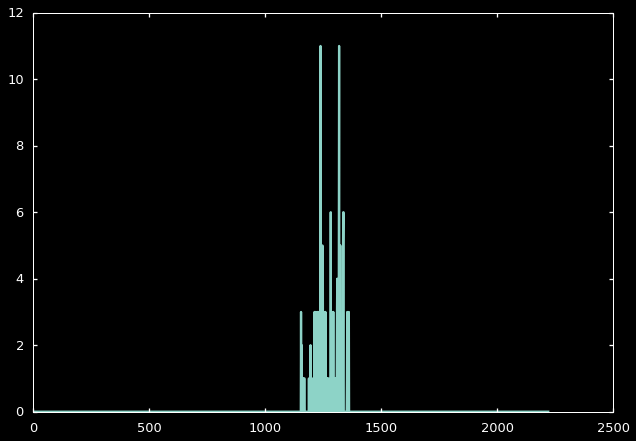

In [60]:
plt.plot(zeros)

In [64]:
activations_series.to_csv('activations-enron.csv')